In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data=pd.read_csv('insurance.csv')
data.sample(5) 

,age,sex,bmi,children,smoker,region,charges
370,61,female,21.09,0,no,northwest,13415.0381
758,30,male,37.43,3,no,northeast,5428.7277
908,63,male,39.80,3,no,southwest,15170.0690
29,31,male,36.30,2,yes,southwest,38711.0000
94,64,female,31.30,2,yes,southwest,47291.0550


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

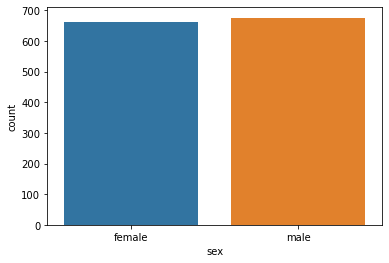

In [4]:
print(data['sex'].value_counts())
sns.countplot(x='sex',data=data)

no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:xlabel='smoker', ylabel='count'>

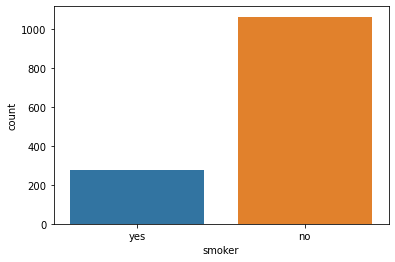

In [5]:
print(data['smoker'].value_counts())
sns.countplot(x='smoker',data=data)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

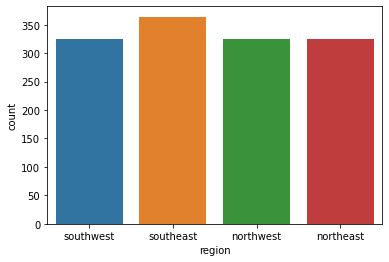

In [6]:
print(data['region'].value_counts())
sns.countplot(x='region',data=data)

In [7]:

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64


<ipython-input-8-61feee41980c>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

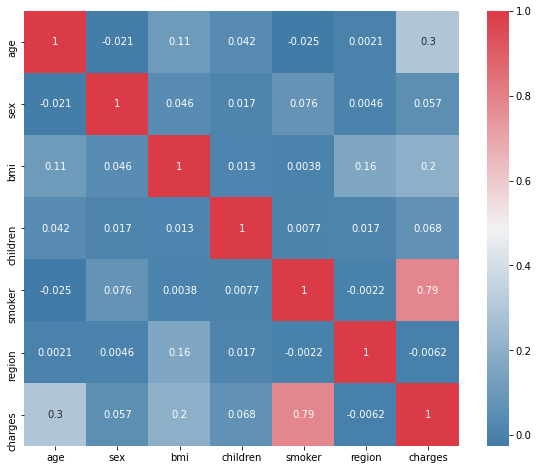

In [8]:

print(data.corr()['charges'].sort_values())
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True,annot=True, ax=ax)

<AxesSubplot:xlabel='charges', ylabel='Count'>

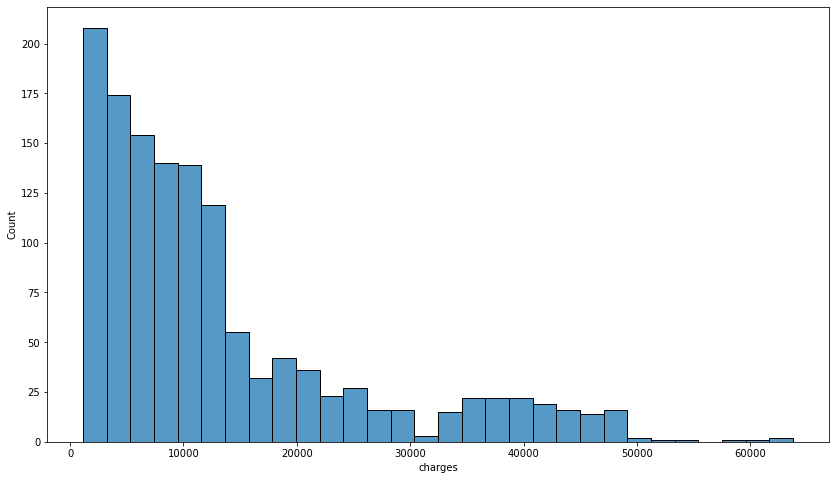

In [9]:
plt.figure(figsize=(14,8))
sns.histplot(data=data,x='charges')

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\madhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

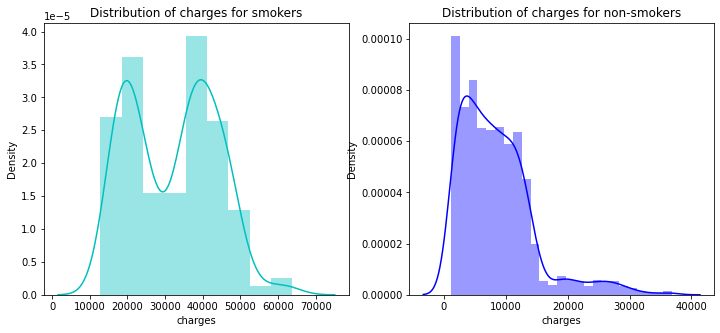

In [10]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

<AxesSubplot:xlabel='smoker', ylabel='count'>

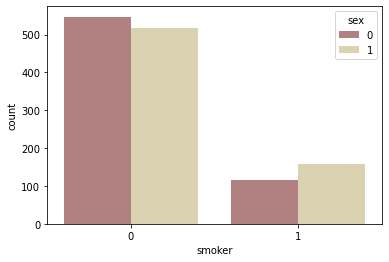

In [11]:
sns.countplot(x="smoker",hue = 'sex', palette="pink", data=data,)


<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

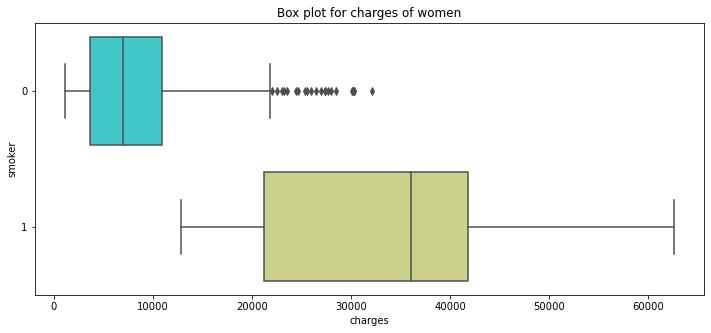

In [12]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'rainbow')


<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

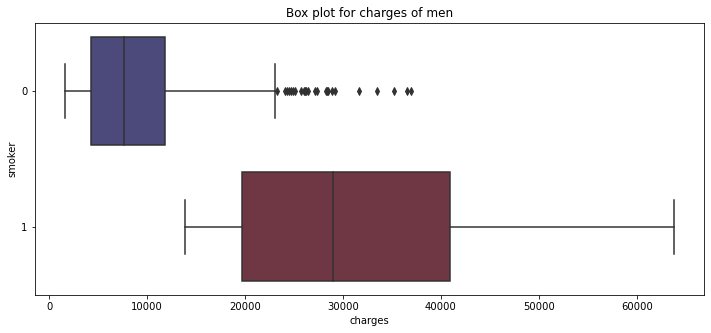

In [13]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'icefire')

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


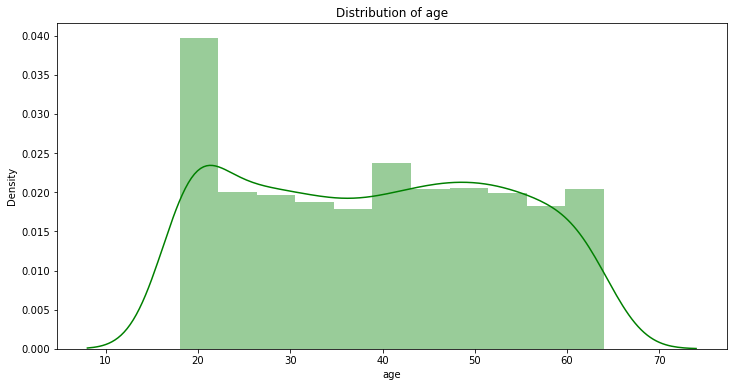

In [14]:
plt.figure(figsize=(12,6))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

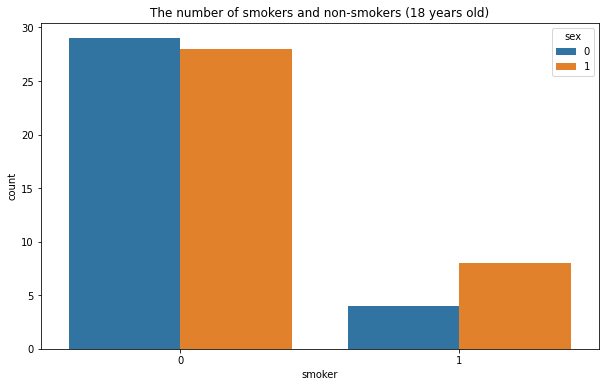

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoker",hue='sex', data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

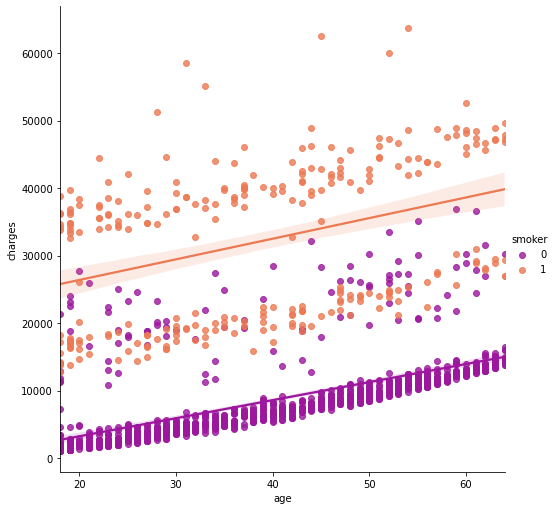

In [16]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'plasma', size = 7)
ax.set_title('Smokers and non-smokers')

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


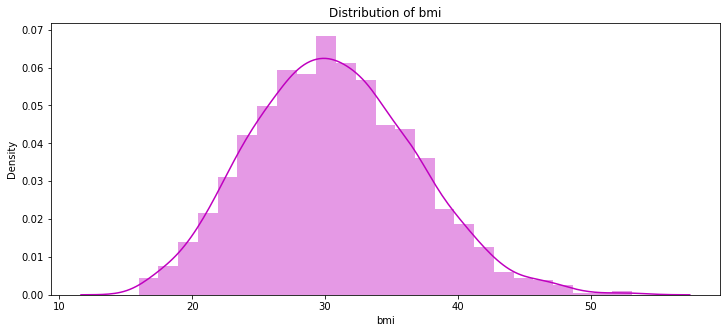

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

C:\Users\madhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


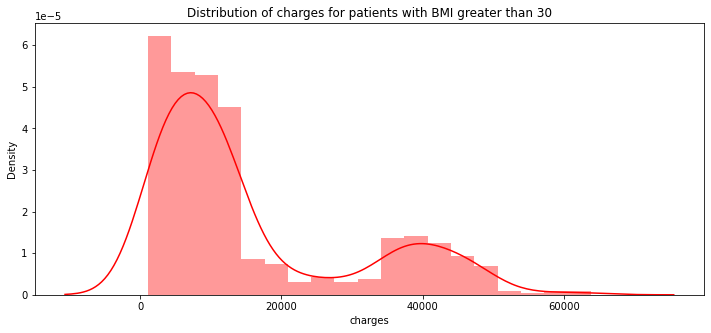

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'r')


C:\Users\madhu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


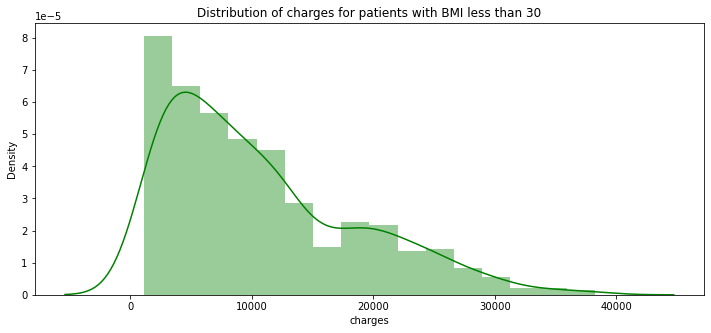

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'g')

<AxesSubplot:xlabel='children', ylabel='count'>

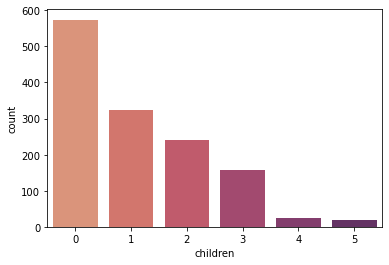

In [20]:

sns.countplot(x="children", palette="flare", data=data,)

In [21]:
R2_Scores = []
models = ['Linear Regression', 'RandomForest Regression','XGBoost Regressor']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [23]:

x = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 42)

lin_reg =make_pipeline(StandardScaler(),LinearRegression())
lin_reg.fit(X_train , y_train)
accuracies = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 10)
y_pred = lin_reg.predict(X_test)
print('')
print('     Linear Regression      ')
print('Score : %.4f' % lin_reg.score(X_test, y_test))
print( accuracies)
print('Mean score: %0.3f'% accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Linear Regression      
Score : 0.7669
[0.76057975 0.74872437 0.851063   0.74054515 0.73217062 0.67252427
 0.59195142 0.69646742 0.76155267 0.77433943]
Mean score: 0.733

MSE    : 35174149.33 
RMSE   : 5930.78 
R2     : 0.77 
